In [31]:
import numpy as np
from numpy import genfromtxt
from learning_model import *
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
%matplotlib inline

Read raw data with zone(from kmeans clustering result)
===

In [32]:
train_part_test = np.genfromtxt('./zone_result/set33_part_train.csv', delimiter=',')
pixel_pos = np.genfromtxt('pixel_pos.csv', delimiter=',')
print (train_part_test)
#print (pixel_pos[1:,:])

[[   6.9745     14.566      37.       -111.464       3.      ]
 [   7.0255     16.5805     39.       -124.574074    3.      ]
 [   7.033      12.193      39.       -118.2125      3.      ]
 ...
 [ 101.971      15.244      42.        -76.2428      6.      ]
 [ 102.1315     16.9        42.        -69.266019    6.      ]
 [ 102.1615     18.085      42.        -67.130097    6.      ]]


PCI training
===

In [33]:
X = train_part_test[:,0:2]
y = train_part_test[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
modelClassifier = KNeighborsClassifier(n_neighbors=3)
modelClassifier.fit(X_train, y_train)
y_pred = modelClassifier.predict(X_test)
print(y_pred)
print(len(y_pred))
print(y_test)
print(len(y_test))
n_accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]: 
        n_accuracy = n_accuracy+1
print ("n_accuracy_pci==",n_accuracy)
print ("len(pci_pred)==",len(y_pred))
acc = n_accuracy/(len(y_pred))
print('pci accuracy: ',acc )

[42. 39. 38. 39. 41. 41. 41. 41. 37. 41. 41. 39. 39. 38. 39. 41. 42. 41.
 38. 38. 39. 38.]
22
[42. 37. 38. 39. 41. 39. 41. 41. 37. 41. 41. 37. 39. 39. 39. 39. 42. 41.
 38. 38. 39. 38.]
22
n_accuracy_pci== 17
len(pci_pred)== 22
pci accuracy:  0.7727272727272727


Predict pci and plot pci map
===

In [34]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5
    
    
    return lng, lat

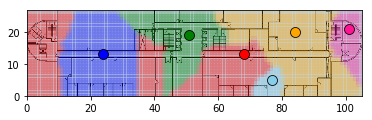

In [35]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
output = modelClassifier.predict(pixel_pos[1:,:])
#print(output)
#np.savetxt('output.csv', output, delimiter=',', fmt='%f')
pci = []
pci_input =  [37, 38, 39, 40, 41, 42, 120, 151, 154, 1, 62]
pci_config = np.array(pci_input)
f = open('./result_pci/pci_result.csv', 'w') #write the pci result into file
f.write('x,y,pci,\n')
#z = np.reshape(output, (y_resolution, x_resolution))
#z[:] = map(list,zip(*z[::-1]))
#z = np.genfromtxt('z.csv', delimiter=',')
#z_pred = np.hstack((xy, pci_map_pred))
#pci_pred = output.reshape(27,105)
z = np.reshape(output, (y_resolution, x_resolution))
#np.savetxt('z.csv', z, delimiter=',', fmt='%f')
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            f.write(result)  # python will convert \n to os.linesep

f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)

Generate all points with pci and zone
===

In [36]:
pci_result_zone = np.genfromtxt('./result_pci/pci_result.csv', delimiter=',')
#print (pci_result_zone)
for i in range(len(pci_result_zone)):
    pci_result_zone[:,3] = "0" 
print (pci_result_zone)
pci_result_zone_pd = pd.DataFrame(pci_result_zone,columns=['x','y','pci','zone'])
pci_result_zone_pd = pci_result_zone_pd.drop(pci_result_zone_pd.index[0])
pci_result_zone_pd.to_csv('./result_pci/pci_result_zone_pd.csv')
#print (pci_result_zone_pd)
train_part_test[:,0] = np.around(train_part_test[:,0])
train_part_test[:,1] = np.around(train_part_test[:,1])
#print (train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
#print (train_part_test_pd)

[[ nan  nan  nan   0.]
 [  0.   0.  39.   0.]
 [  1.   0.  39.   0.]
 ...
 [102.  26.  42.   0.]
 [103.  26.  42.   0.]
 [104.  26.  42.   0.]]


Merge raw data zone and use KNN to predict points zone without real data
===

In [37]:
#print(train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
#print (train_part_test_pd)
df = train_part_test_pd.append(pci_result_zone_pd)
#print("len(df)==",len(df))
#df = train_part_test_pd.loc[train_part_test_pd['x'].isin(pci_result_zone_pd['x']) & train_part_test_pd['y'].isin(pci_result_zone_pd['y'])]
#df1 = pci_result_zone_pd.loc[pci_result_zone_pd['x'].isin(train_part_test_pd['x']) & pci_result_zone_pd['y'].isin(train_part_test_pd['y'])]
#df = train_part_test_pd.loc[(train_part_test_pd['x'] != pci_result_zone_pd['x']) & (train_part_test_pd['y'] != pci_result_zone_pd['y'])]
#print("df==",df)
df_no_rsrp = df.drop(['rsrp'],axis=1)
#print(df_no_rsrp)
print(len(df_no_rsrp))
df_dul = df_no_rsrp.drop_duplicates(subset=['x', 'y'], keep='first', inplace=False)
print(len(df_dul))

df_dul = df_dul[['x','y','pci','zone']]
#print(df_dul)
#df = df.drop(['Unnamed: 0'],axis=1)
#df.to_csv('zone_compare1_nosort.csv')
#print(len(df))
#df_sort = df_dul.sort_values(by=['y','x'])
#df_sort.to_csv('./result_pci/zone_handle.csv')
#print("len(df_sort)==",len(df_sort))


3055
2835


/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [38]:
df_dul_np = df_dul.values
print(df_dul_np)
np.savetxt('./result_pci/df_dul_np_result.csv', df_dul_np, delimiter=',', fmt='%f')
X = df_dul_np[:217,0:3]
y = df_dul_np[:217,3]
modelClassifier = KNeighborsClassifier(n_neighbors=3)
pci_pred = modelClassifier.fit(X, y).predict(df_dul_np[218:,0:3])
#print(pci_pred)
print("===")
#print(type(pci_pred))
#print("len(pci_pred)==",len(pci_pred))
print(df_dul_np)
for i in range(len(pci_pred)):
    df_dul_np[218+i:,3] = pci_pred[i]
print (len(pci_pred))
print (df_dul_np)
np.savetxt('./result_pci/zone_knn_result.csv', pci_pred, delimiter=',', fmt='%f')
print (df_dul_np)
df_dul_sort_pd = pd.DataFrame(df_dul_np,columns=['x','y','pci','zone'])
print(type(df_dul_sort_pd))
print (df_dul_sort_pd)
df_dul_sort = df_dul_sort_pd.sort_values(by=['y','x'])
print(type(df_dul_sort))
#print (df_dul_sort.tail())
df_dul_sort.to_csv('./result_pci/zone_knn_result_sort.csv')

print (df_dul_sort)

[[  7.  15.  37.   3.]
 [  7.  17.  39.   3.]
 [  7.  12.  39.   3.]
 ...
 [102.  26.  42.   0.]
 [103.  26.  42.   0.]
 [104.  26.  42.   0.]]
===
[[  7.  15.  37.   3.]
 [  7.  17.  39.   3.]
 [  7.  12.  39.   3.]
 ...
 [102.  26.  42.   0.]
 [103.  26.  42.   0.]
 [104.  26.  42.   0.]]
2617
[[  7.  15.  37.   3.]
 [  7.  17.  39.   3.]
 [  7.  12.  39.   3.]
 ...
 [102.  26.  42.   6.]
 [103.  26.  42.   6.]
 [104.  26.  42.   6.]]
[[  7.  15.  37.   3.]
 [  7.  17.  39.   3.]
 [  7.  12.  39.   3.]
 ...
 [102.  26.  42.   6.]
 [103.  26.  42.   6.]
 [104.  26.  42.   6.]]
<class 'pandas.core.frame.DataFrame'>
          x     y   pci  zone
0       7.0  15.0  37.0   3.0
1       7.0  17.0  39.0   3.0
2       7.0  12.0  39.0   3.0
3       9.0  15.0  39.0   3.0
4       9.0  17.0  37.0   3.0
5       9.0  12.0  37.0   3.0
6      10.0  13.0  39.0   3.0
7      11.0  13.0  37.0   3.0
8      13.0  13.0  37.0   3.0
9      15.0  13.0  37.0   3.0
10     16.0  13.0  37.0   3.0
11     18.0  13.0

[[3. 3. 3. ... 2. 2. 2.]
 [3. 3. 3. ... 2. 2. 1.]
 [3. 3. 3. ... 2. 1. 1.]
 ...
 [3. 3. 3. ... 6. 6. 6.]
 [3. 3. 3. ... 6. 6. 6.]
 [3. 3. 3. ... 6. 6. 6.]]


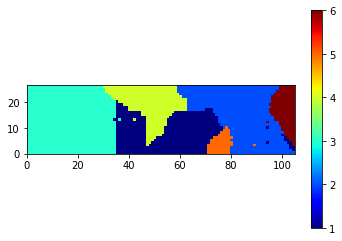

In [39]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
data_plot = (df_dul_sort.values[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
print(data_plot)

plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(data_plot,cmap='jet',alpha=1)
plt.colorbar()

Get raw data rsrp and do rsrp training
===

In [40]:
#::train_part_test is raw data
print(train_part_test)
#::df_dul_sort is knn result for every point
print(df_dul_sort.values)

[[   7.         15.         37.       -111.464       3.      ]
 [   7.         17.         39.       -124.574074    3.      ]
 [   7.         12.         39.       -118.2125      3.      ]
 ...
 [ 102.         15.         42.        -76.2428      6.      ]
 [ 102.         17.         42.        -69.266019    6.      ]
 [ 102.         18.         42.        -67.130097    6.      ]]
[[  0.   0.  39.   3.]
 [  1.   0.  39.   3.]
 [  2.   0.  39.   3.]
 ...
 [102.  26.  42.   6.]
 [103.  26.  42.   6.]
 [104.  26.  42.   6.]]


In [41]:
for i in range(1,7):
    #print(i)
    zone = np.array([])
    zone = np.where(train_part_test[:,4] == i)
    #print(train_part_test[zone[0],:])
    print("zone == ",zone[0])
    X = train_part_test[zone[0],0:3]
    y = train_part_test[zone[0],3]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model = KNeighborsRegressor(n_neighbors=3)
    model.fit(X_train, y_train)
    filename = 'finalized_model_' + str(i) +'-' + '.sav'
    pickle.dump(model, open(filename, 'wb'))
    y_pred = model.predict(X_test)
    #print(pci_result_zone[:,2])
    zone_allpoint = np.where(df_dul_sort.values[:,3] == i)
    print (len(df_dul_sort.values))
    #predict_zone = model.predict(pci_result_zone[zone_allpoint[0],0:3])
    predict_zone = model.predict(df_dul_sort.values[zone_allpoint[0],0:3])
    #print(zone_allpoint[0]+1)
    print(len(predict_zone))
    #predict_zone_every = np.append(pci_result_zone[zone_allpoint[0],0:3],predict_zone)
    name = './zone_result/zone_predict_' + str(i) +'.csv'
    df_loc = pd.DataFrame(df_dul_sort.values[zone_allpoint[0],0:3],columns=['x','y','pci'])
    df_rsrp = pd.DataFrame(predict_zone,columns=['rsrp'])
    df_result = pd.concat([df_loc,df_rsrp],axis=1)
    #print(str(i)+"==="+"df==",df)
    df_result.to_csv(name,index=False,columns=['x','y','pci','rsrp'])
    #df_result = []
    
    #np.savetxt(name, predict_zone_every, delimiter=',', fmt='%f')
    #print("X_test",X_test)
    #print("y_pred",y_pred)
    #print("predict_zone",predict_zone)
    print("[MSE]==",mean_squared_error(y_test, y_pred))
    print("[RMSE]==",mean_squared_error(y_test, y_pred)**(0.5))
    loaded_model = pickle.load(open(filename, 'rb'))
df1 = pd.read_csv('./zone_result/zone_predict_1.csv')
df2 = pd.read_csv('./zone_result/zone_predict_2.csv')  
df3 = pd.read_csv('./zone_result/zone_predict_3.csv')  
df4 = pd.read_csv('./zone_result/zone_predict_4.csv')  
df5 = pd.read_csv('./zone_result/zone_predict_5.csv')
df6 = pd.read_csv('./zone_result/zone_predict_6.csv')  
#df7 = pd.read_csv('./zone_result/zone_predict_7.csv')
df_merge_list = [df1,df2,df3,df4,df5,df6]
df_merge_result = pd.concat(df_merge_list)
df_merge_result.to_csv('./zone_result/zone_predict_total.csv', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
'''
    zone_allpoint = np.where(pci_result_zone[:,3] == i)
    #rint (zone_allpoint)
    print(pci_result_zone[zone_allpoint,0:3])
    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])
    name = 'zone_predict_' + str(i) +'-' + '.csv'
    np.savetxt(name, predict_zone, delimiter=',', fmt='%f')
    result = loaded_model.score(X_test, y_test)
    #print("load result==",result)
'''

zone ==  [ 20  22  23  29  32  58  60  61  62  63  64  67  68  69  72  73  75  76
  77  80  81  82  83  85  87  88  89  90  92  93  94  97  98  99 100 101
 103 104 105 108 109 110 113 114 116 118 122 125 202]
2835
592
[MSE]== 193.10326162499845
[RMSE]== 13.896159959679453
zone ==  [ 71  78  79  84  86  91  95  96 102 106 111 112 119 120 121 126 127 128
 129 130 131 132 136 137 138 139 140 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 203 205 207]
2835
721
[MSE]== 7.778395723721999
[RMSE]== 2.7889775409138737
zone ==  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
2835
926
[MSE]== 19.797388386364553
[RMSE]== 4.449425624321026
zone ==  [24 25 26 27 28 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 59 65 66 70 74]
2835
364
[MSE]== 6.4907144877283
[RMSE]==

'\n    zone_allpoint = np.where(pci_result_zone[:,3] == i)\n    #rint (zone_allpoint)\n    print(pci_result_zone[zone_allpoint,0:3])\n    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])\n    name = \'zone_predict_\' + str(i) +\'-\' + \'.csv\'\n    np.savetxt(name, predict_zone, delimiter=\',\', fmt=\'%f\')\n    result = loaded_model.score(X_test, y_test)\n    #print("load result==",result)\n'

Plot rsrp map
===

[[   0.            0.           39.         -111.084508  ]
 [   1.            0.           39.         -111.084508  ]
 [   2.            0.           39.         -106.79513533]
 ...
 [ 102.           26.           42.          -70.78711733]
 [ 103.           26.           42.          -70.78711733]
 [ 104.           26.           42.          -70.78711733]]
2835


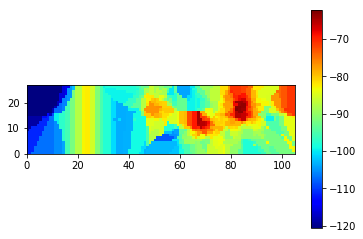

In [42]:
df_total = pd.read_csv('./zone_result/zone_predict_total.csv')  
df_total_sort = df_total.sort_values(by=['y','x'])
#print (df_total_sort)
rsrp_map_frompd = df_total_sort.values
print (rsrp_map_frompd)
print (len(rsrp_map_frompd))
rsrp_map_pd = (rsrp_map_frompd[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(rsrp_map_pd,cmap='jet',alpha=1)
plt.savefig('./result_rsrp/rsrp_map.png')
plt.colorbar()

Merge to 51-5F map
===

In [43]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./result_rsrp/rsrp_map.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
bk = bk.resize((432, 288))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('./result_rsrp/zone_rsrp.png')

(623, 411)
(432, 288)
